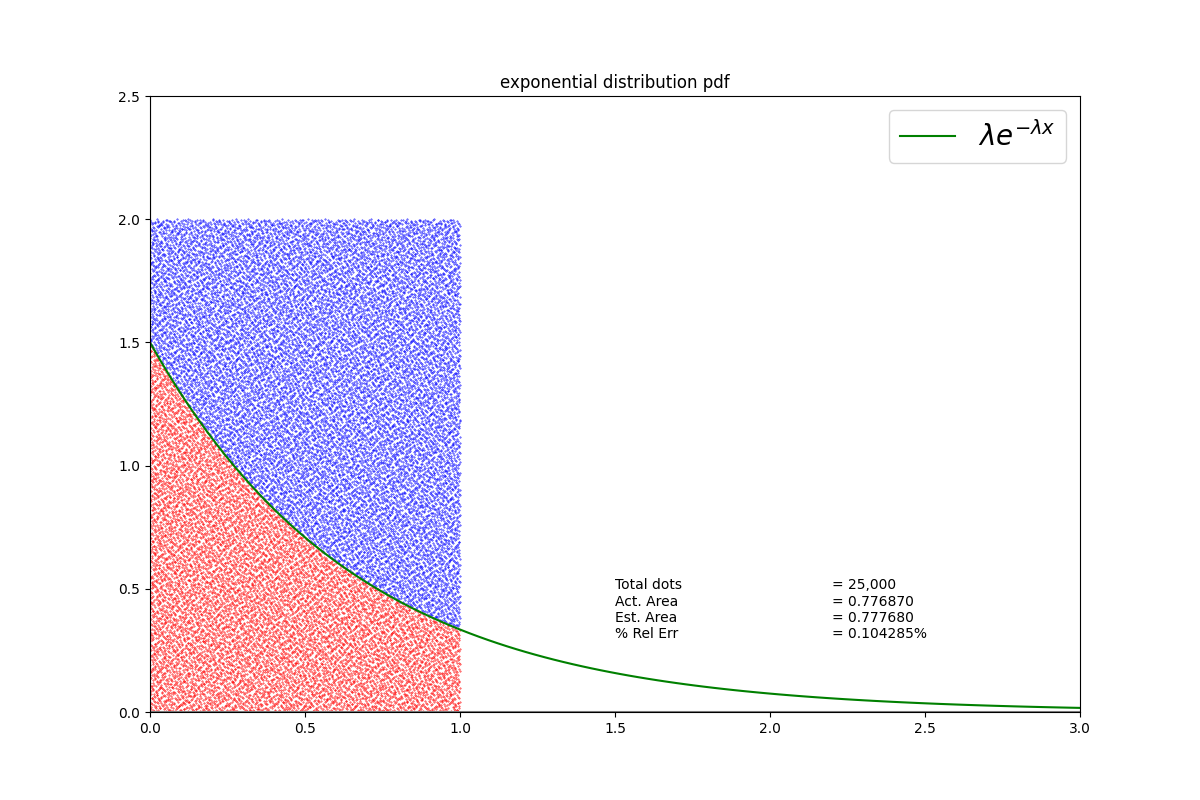

In [6]:
"""mc_exp_dist.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
import matplotlib.patches
from numba import float64, vectorize  # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

# citation: professor's answers

# height of 2 bc max of f(x) is 1.5
sample_area = matplotlib.patches.Rectangle((0,0),1,2)

#pdf; 90 mins = 1.5 hrs
def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    return 1.5 * np.exp(-1.5 * x)

#cdf; integral
def g(x):
    return 1 - np.exp(-1.5 * x)


@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_std_normal(ax: Axes) -> None:
    iterations = 25000

    primes: list[int] = [2, 3]

    # scale the x & y to fit the sample area
    x: NDArray[np.float_] = halton(np.arange(iterations), primes[0]) * sample_area.get_width() + sample_area.get_x()  # type: ignore
    y: NDArray[np.float_] = halton(np.arange(iterations), primes[1])  * sample_area.get_height() + sample_area.get_y() # type: ignore

    # find distance between f(x) and randomly generated y
    d: NDArray[np.float_] = f(x) - y

    x_in: NDArray[np.float_] = x[d >= 0.0]
    y_in: NDArray[np.float_] = y[d >= 0.0]

    x_out: NDArray[np.float_] = x[d < 0.0]
    y_out: NDArray[np.float_] = y[d < 0.0]

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=MarkerStyle("."), s=pixel_size)

    act_x: NDArray[np.float_] = np.linspace(0, 3, 100)
    act_y: NDArray[np.float_] = f(act_x)
    ax.plot(
        act_x, act_y, color="green", label=r"$\lambda e^{-\lambda x}$"
    )

    # to estimate, multiply by sample area
    est_area: float = np.count_nonzero(d >= 0.0) / iterations * (sample_area.get_width() * sample_area.get_height())
    # to find actual, calculate integral of function (given by cdf function)
    act_area = g(sample_area.get_x() + sample_area.get_width()) - g(sample_area.get_x())
    err: float = (est_area - act_area) / act_area

    ax.set_title("exponential distribution pdf")
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 2.5)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.legend(loc="upper right", fontsize="20")

    ax.text(1.5, 0.3, "Total dots\nAct. Area\nEst. Area\n% Rel Err", ha="left")

    # fmt: off
    ax.text(2.2, 0.3,
        f"= {iterations:,}\n= {act_area:.6f}\n= {est_area:.6f}\n= {err:.6%}", ha="left")
    # fmt: on


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(12, 8))
    plot_std_normal(plt.axes())
    plt.show()


main()